In [79]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from datetime import datetime, timezone
from collections import Counter


In [80]:
# Load Data into Panda Dataframe

file_path = 'data/SensorLogFiles/2023-05-11_1_19_58 PM_Apple Watch.csv'

df = pd.read_csv(file_path, engine='python')
df = df[0:1000]
display(df)


,loggingTime(txt),locationTimestamp_since1970(s),locationLatitude(WGS84),locationLongitude(WGS84),locationAltitude(m),locationSpeed(m/s),locationSpeedAccuracy(m/s),locationCourse(°),locationCourseAccuracy(°),locationVerticalAccuracy(m),...,pedometerDistance(m),pedometerFloorAscended(N),pedometerFloorDescended(N),pedometerEndDate(txt),altimeterTimestamp_sinceReboot(s),altimeterReset(bool),altimeterRelativeAltitude(m),altimeterPressure(kPa),batteryState(N),batteryLevel(R)
0,2023-05-11T13:19:58.510-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.11,101.3567,1.0,0.75
1,2023-05-11T13:19:58.545-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.11,101.3567,1.0,0.75
2,2023-05-11T13:19:58.580-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.11,101.3567,1.0,0.75
3,2023-05-11T13:19:58.610-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.11,101.3567,1.0,0.75
4,2023-05-11T13:19:58.645-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.11,101.3567,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-11T13:20:32.194-07:00,1.683836e+09,37.423228,-122.181550,45.44315,0.247357,0.068647,196.530907,13.726594,2.400000,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.22,101.3484,1.0,0.75
996,2023-05-11T13:20:32.230-07:00,1.683836e+09,37.423228,-122.181550,45.44315,0.247357,0.068647,196.530907,13.726594,2.400000,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.22,101.3484,1.0,0.75
997,2023-05-11T13:20:32.264-07:00,1.683836e+09,37.423228,-122.181550,45.44315,0.247357,0.068647,196.530907,13.726594,2.400000,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.22,101.3484,1.0,0.75
998,2023-05-11T13:20:32.299-07:00,1.683836e+09,37.423228,-122.181550,45.44315,0.247357,0.068647,196.530907,13.726594,2.400000,...,0.0,0.0,0.0,NaN,7.055292e+08,0.0,0.22,101.3484,1.0,0.75


In [81]:
# Get X,Y,Z Data
x_data = df["accelerometerAccelerationX(G)"]
y_data = df["accelerometerAccelerationY(G)"]
z_data = df["accelerometerAccelerationZ(G)"]

In [82]:
# Obtain Elapsed Time


timestamps = pd.to_datetime(df["loggingTime(txt)"])
time_diff = timestamps.diff()
cumulative_seconds = time_diff.dt.total_seconds().cumsum().fillna(0)


df["Elapsed Time (s)"] =cumulative_seconds  

In [83]:
# # Resample dataframe at X second intervals

# freq = 1

# df['timestamp'] = pd.to_datetime(df["loggingTime(txt)"])

# # Set the "timestamp" column as the dataframe index
# df.set_index('timestamp', inplace=True)

# # Downsample the dataframe to a lower frequency within each interval
# downsampled_df = df.resample(str(freq)+'S').mean()
# df_without_nan_downsampled_df = df.dropna(axis=1)

In [84]:
# # New downsampled time series data

# new_x_data = downsampled_df["accelerometerAccelerationX(G)"]
# new_y_data = downsampled_df["accelerometerAccelerationY(G)"]
# new_z_data = downsampled_df["accelerometerAccelerationZ(G)"]

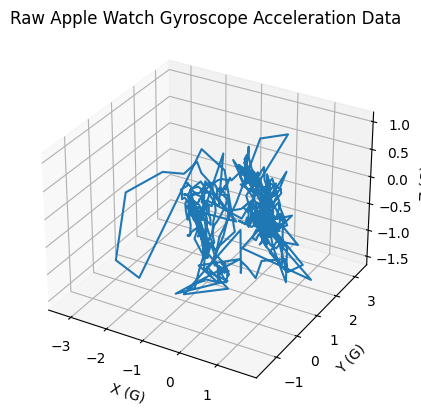

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_data, y_data, z_data)

ax.set_xlabel('X (G)')
ax.set_ylabel('Y (G)')
ax.set_zlabel('Z (G)')

ax.set_title('Raw Apple Watch Gyroscope Acceleration Data')

plt.show()

In [86]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(new_x_data, new_y_data, new_z_data)

# ax.set_xlabel('X (G)')
# ax.set_ylabel('Y (G)')
# ax.set_zlabel('Z (G)')

# ax.set_title('Downsampled Apple Watch Gyroscope Acceleration Data')

# plt.show()

In [87]:
timestamps = pd.to_datetime(df["loggingTime(txt)"])
time_diff = timestamps.diff()
cumulative_seconds = time_diff.dt.total_seconds().cumsum().fillna(0)


df["Elapsed Time (s)"] =cumulative_seconds  
time = df['Elapsed Time (s)']

df['Acceleration X (m/s2)'] = df['motionUserAccelerationX(G)'] * 9.80665
df['Acceleration Y (m/s2)'] = df['motionUserAccelerationY(G)']* 9.80665
df['Acceleration Z (m/s2)'] = df['motionUserAccelerationZ(G)']* 9.80665



# Calculate velocity X by integrating acceleration over time
df['Velocity X (m/s)'] = df['Acceleration X (m/s2)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate velocity Y by integrating acceleration over time
df['Velocity Y (m/s)'] = df['Acceleration Y (m/s2)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate velocity Z by integrating acceleration over time
df['Velocity Z (m/s)'] = df['Acceleration Z (m/s2)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate distance X by integrating velocity over time
df['Distance X (m)'] = df['Velocity X (m/s)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate distance Y by integrating velocity over time
df['Distance Y (m)'] = df['Velocity Y (m/s)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate distance Z by integrating velocity over time
df['Distance Z (m)'] = df['Velocity Z (m/s)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

x_dist = df["Distance X (m)"]
y_dist = df["Distance Y (m)"]
z_dist = df["Distance Z (m)"]

print(x_dist)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_dist, y_dist, z_dist)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

ax.set_title('Apple Watch Distance')

plt.show()

0        0.000000
1        0.000203
2        0.000393
3        0.000491
4        0.000767
          ...    
995    270.343866
996    325.073641
997    307.601914
998    317.270009
999    281.496340
Name: Distance X (m), Length: 1000, dtype: float64


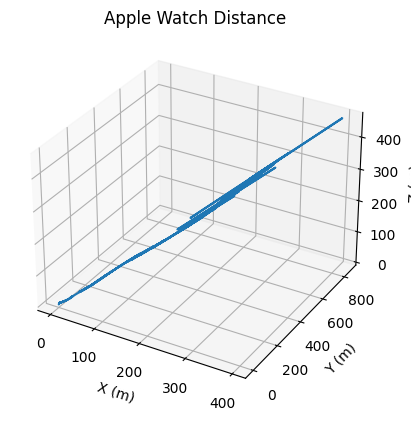

In [88]:
x_dist = df["Distance X (m)"]
y_dist = df["Distance Y (m)"]
z_dist = df["Distance Z (m)"]

print(x_dist)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_dist, y_dist, z_dist)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

ax.set_title('Apple Watch Distance')

plt.show()

In [89]:
display(df)

,loggingTime(txt),locationTimestamp_since1970(s),locationLatitude(WGS84),locationLongitude(WGS84),locationAltitude(m),locationSpeed(m/s),locationSpeedAccuracy(m/s),locationCourse(°),locationCourseAccuracy(°),locationVerticalAccuracy(m),...,Elapsed Time (s),Acceleration X (m/s2),Acceleration Y (m/s2),Acceleration Z (m/s2),Velocity X (m/s),Velocity Y (m/s),Velocity Z (m/s),Distance X (m),Distance Y (m),Distance Z (m)
0,2023-05-11T13:19:58.510-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.000,0.179798,-0.241092,0.024674,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
1,2023-05-11T13:19:58.545-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.035,-0.014123,-0.292106,0.098061,0.005799,-0.018662,0.004296,0.000203,-0.000653,0.000150
2,2023-05-11T13:19:58.580-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.070,-0.010598,-0.167385,-0.052321,0.005428,-0.024520,0.002464,0.000393,-0.001511,0.000237
3,2023-05-11T13:19:58.610-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.100,0.016757,-0.284077,0.066378,0.005155,-0.029540,0.004104,0.000491,-0.002182,0.000326
4,2023-05-11T13:19:58.645-07:00,1.683836e+09,37.423002,-122.181599,49.09860,-1.000000,-1.000000,-1.000000,-1.000000,83.079727,...,0.135,-0.013716,-0.287278,0.208531,0.005534,-0.044518,0.012086,0.000767,-0.004103,0.000803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-11T13:20:32.194-07:00,1.683836e+09,37.423228,-122.181550,45.44315,0.247357,0.068647,196.530907,13.726594,2.400000,...,33.684,-1.377601,1.557922,3.784303,15.352589,22.640200,21.549534,270.343866,571.657526,316.734020
996,2023-05-11T13:20:32.230-07:00,1.683836e+09,37.423228,-122.181550,45.44315,0.247357,0.068647,196.530907,13.726594,2.400000,...,33.720,-1.721226,1.679050,3.798117,18.361143,27.228686,25.996173,325.073641,686.969264,381.016686
997,2023-05-11T13:20:32.264-07:00,1.683836e+09,37.423228,-122.181550,45.44315,0.247357,0.068647,196.530907,13.726594,2.400000,...,33.754,-1.451024,1.713147,3.153960,17.291744,25.774228,24.659176,307.601914,649.680629,360.687505
998,2023-05-11T13:20:32.299-07:00,1.683836e+09,37.423228,-122.181550,45.44315,0.247357,0.068647,196.530907,13.726594,2.400000,...,33.789,-1.657598,1.889764,2.215943,17.742309,26.598435,25.462004,317.270009,669.719828,372.187131


In [90]:
# Downsampled Apple Watch Distance

downsampled_df = df.resample(str(freq)+'S').mean()
df_without_nan_downsampled_df = df.dropna(axis=1)
new_x_dist = downsampled_df["Distance X (m)"]
new_y_dist = downsampled_df["Distance Y (m)"]
new_z_dist = downsampled_df["Distance Z (m)"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(new_x_dist, new_y_dist, new_z_dist)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

ax.set_title('Downsampled Apple Watch Distance')

plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

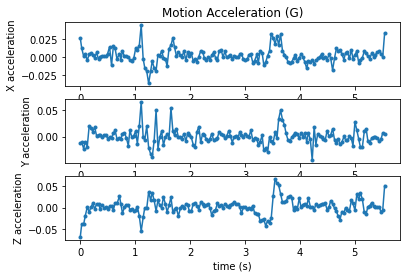

In [ ]:
# Acceleration Data 


x_accel = df["motionUserAccelerationX(G)"]
y_accel = df["motionUserAccelerationY(G)"]
z_accel = df["motionUserAccelerationZ(G)"]

plt.subplot(3, 1, 1)
plt.plot(time, x_accel, '.-')
plt.title('Motion Acceleration (G)')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(time, y_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(time, z_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.show()

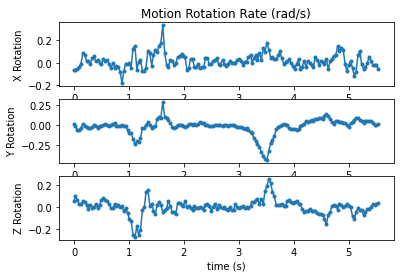

In [ ]:
# Rotation Data 

x_accel = df["motionRotationRateX(rad/s)"]
y_accel = df["motionRotationRateY(rad/s)"]
z_accel = df["motionRotationRateZ(rad/s)"]

plt.subplot(3, 1, 1)
plt.plot(time, x_accel, '.-')
plt.title('Motion Rotation Rate (rad/s)')
plt.ylabel('X Rotation')

plt.subplot(3, 1, 2)
plt.plot(time, y_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Y Rotation')

plt.subplot(3, 1, 3)
plt.plot(time, z_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Z Rotation')

plt.show()

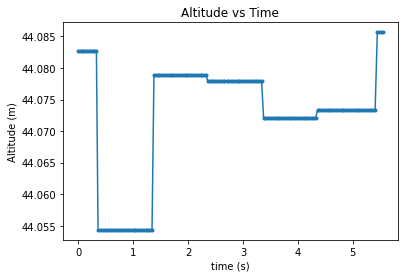

In [ ]:
# Golf Swing 

altitude = df["locationAltitude(m)"]

plt.plot(time, altitude, '.-')
plt.xlabel('time (s)')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs Time')
plt.show()

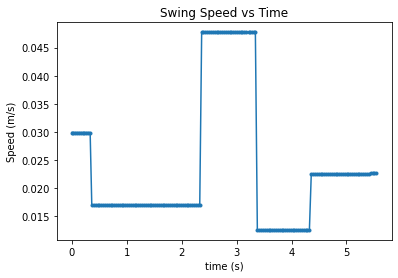

In [ ]:
# Speed vs Time 

speed = df["locationSpeed(m/s)"]

plt.plot(time,speed, '.-')
plt.xlabel('time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Swing Speed vs Time')
plt.show()



In [ ]:
# Correlation between acceleration in the Y direction and latitude

correlation = df['accelerometerAccelerationY(G)'].corr(df['locationLatitude(WGS84)'])

print("Correlation between acceleration in the Y and latitude:", correlation)

Correlation between acceleration in the Y and latitude: -0.8327269224921477
